In [28]:
import numpy as np
from numpy import exp, sqrt, log
from scipy.stats import norm
import matplotlib.pyplot as plt

#### European Call

9.6
Error: 0.85


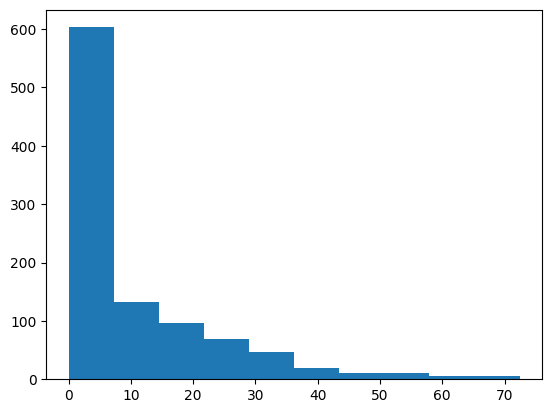

In [33]:
# Set Seed
np.random.seed(10)

# Define constants
S0 = 100
T = 1
r = .05
sigma = .2
K = 100

# Sample Standard Normal (Z) for n paths
n = 1000
Z = norm.rvs(size=n)

# Convert samples to terminal prices of the stock at T
S_T = S0 * exp( 
    (r - .5*sigma**2)*T + sigma*sqrt(T)*Z )

# Convert terminal prices to option payoff
C_T_payoff = exp(-r*T) * np.maximum(S_T - K, 0)

# Determine average call payoff
C_T_bar = 1/n*np.sum(C_T_payoff)
print(round(C_T_bar,2))

# Compare to known value from BS formula
C_BS = S0 * norm.cdf(
    (log(S0/K) + (r+.5*sigma**2*T)) / (sigma*sqrt(T))
) - K * exp(-r*T) * norm.cdf(
    (log(S0/K) + (r-.5*sigma**2*T)) / (sigma*sqrt(T))
)

print(f"Error: {round(C_BS - C_T_bar,2)}")

plt.hist(C_T_payoff)
plt.show()

#### Asian Call

5.678217035759444


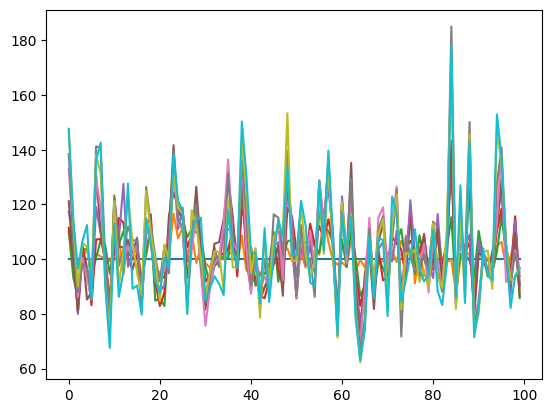

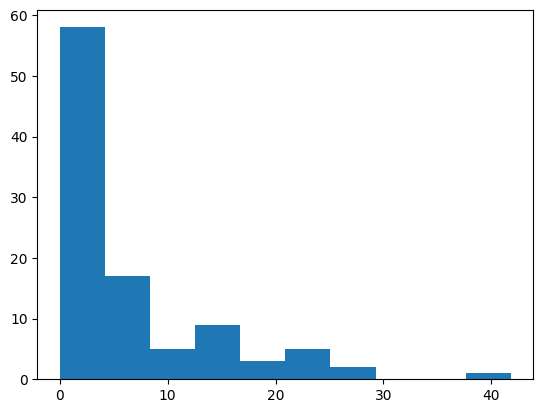

In [27]:
# Set Seed
np.random.seed(10)

# Define constants
S0 = 100
T = 1
r = .05
sigma = .2
K = 100

n = 100 # Number of simulations
m = 10 # Number of steps per simulation
S = np.zeros((n,m)) # Store each simulation path and step
S[:, 0] = S0 # Initialize each simulation at S0
dt = T/m # Define step-size

# For each step in a single simulation
for j in range(1,m):
    Z_j = norm.rvs(size=n)
    S[:,j] = S[:, j-1] * exp( (r - .5*sigma**2)*dt + sigma*sqrt(dt)*Z_j)

# Determine the average stock value for each path
S_bar = 1/m * np.sum(S, axis=1)

# Determine the option payoff for each path
C_simulations = exp(-r*T) * np.maximum(S_bar - K, 0)

# Determine the average option payoff for n simulations
C_bar = 1/n * np.sum(C_simulations)
print(C_bar)

plt.plot(S)
plt.show()

plt.hist(C_simulations)
plt.show()

**NOTE: No drift in the model**